# Intro to Visualizations

### Table of Contents

1. 

In [1]:
# run this cell

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# transfer to a csv

ces_data = Table.read_table("ces_data.csv")

for i in np.arange(ces_data.num_columns):
    if i != 3 and i != 11:
        ces_data = ces_data.where(i, are.above_or_equal_to(0))

## Numerical vs. Categorical Data

When working with data, it's important to consider whether it is numerical or categorical. This will help you create visualizations and make better analyses regarding the data.

We work with two types -- numerical data and categorical data. It may sound pretty straightforward, but here are the definitions.

**Numerical Data:** values that are from an ordered number scale where the _differences_ are meaningful

**Categorical Data:** values are from a specific inventory that may or may not have an ordering

<div class="alert alert-info">
    Run the following cell to load the ces_data table from yesterday. Then answer the following questions about numerical and categorical data.
    </div>

In [3]:
ces_data

Census.Tract,CES.3.0.Score,Total.Population,California.County,Hispanic....,White....,African.American....,Native.American....,Asian.American....,Other....,ZIP,Longitude,Latitude,Ozone,PM2.5,Diesel.PM,Drinking.Water,Pesticides,Tox..Release,Traffic,Cleanup.Sites,Groundwater.Threats,Haz..Waste,Imp..Water.Bodies,Solid.Waste,Pollution.Burden,Asthma,Low.Birth.Weight,Poverty,Unemployment
6019001100,94.09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,93706,-119.782,36.7097,0.065,15.4,48.524,681.2,2.75,18552,909.14,80.5,45.75,0.795,0,21.75,79.96,131.64,7.44,76.3,17.6
6071001600,90.68,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,91761,-117.618,34.0578,0.062,13.31,38.556,904.66,1.37,7494.24,782.26,66.2,36,1.25,5,12,81.19,60.66,7.04,72.5,12.3
6019000200,85.97,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,93706,-119.806,36.7355,0.062,15.4,47.445,681.2,3.03,12454.9,576.52,22,30.25,0.2,0,2.5,71.16,142.12,10.16,86.8,16.1
6077000801,82.49,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,95203,-121.315,37.9405,0.046,12.54,24.117,278.76,12.93,2387.78,1305.01,50.1,132.1,0.795,19,27,74.48,142.17,6.23,61.3,19.6
6019001500,82.03,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,93725,-119.718,36.6816,0.065,15.4,18.846,1000.24,3518.41,21790.7,435.16,60,54.2,13.1,0,50.8,80.2,90.48,4.5,66.4,18.6
6037204920,80.73,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,90023,-118.197,34.0175,0.046,12.89,56.52,714.48,0,39040.2,2943.44,36.7,25,4.93,7,3.85,76.73,68.74,7.35,66.4,11.6
6077000300,80.18,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,95203,-121.302,37.9524,0.046,13.44,21.76,278.76,172.49,707.536,885.52,89.7,149.05,0.135,14,2.3,68.27,169.56,8.36,76.2,14.4
6019001000,80.13,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,93706,-119.804,36.6978,0.065,15.4,20.848,788.02,1435.93,6996.96,243.54,15.45,20,0,0,10,66.88,142.28,7.83,74.5,20
6037206050,79.03,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,90023,-118.224,34.0299,0.046,12.89,53.958,664.07,0,10378.2,2810.82,36.05,16.25,10.025,7,22.1,77.09,58.03,6.71,75.7,28.5
6019000400,78.53,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,93721,-119.776,36.7277,0.065,15.4,54.356,681.2,114.96,125384,815.36,15.95,13.5,0.755,0,0.5,73.89,107.8,4.79,83.4,23.5


Does the column "California.County" contain numerical or categorical data?

_Written Answer:_

Does the column "ZIP" contain numerical or categorical data?

_Written Answer:_

Does the column "Asthma" contain numerical or categorical data?

_Written Answer:_

You can see that looking at whether or not the data is a number is not sufficient enough to determine whether the data is numerical. Many times, categorical data can be represented with numbers in the way that the column "Census.Tract" does. Although census tracts are shown to be numbers, they represent a community or region.

## Scatter Plots

A scatter plot is a visualization that is pretty easy to recognize. Each datapoint (or row in our table) gets its own point and is placed on a !!

In [28]:
la_county = ces_data.where("California.County", "Los Angeles")

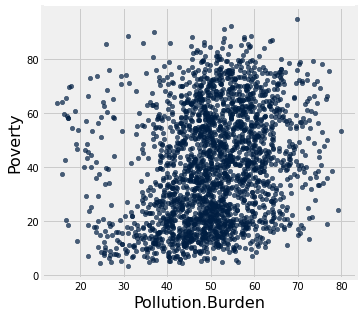

In [29]:
la_county.scatter("Pollution.Burden", "Poverty")

It seems like there might be a slight upwards trend, so let's try another attribute that might correlate more with poverty.

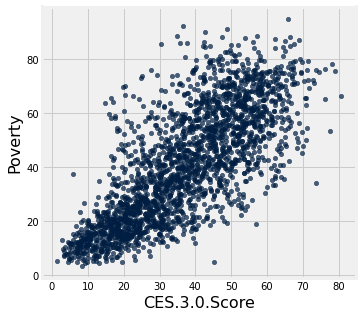

In [30]:
la_county.scatter("CES.3.0.Score", "Poverty")

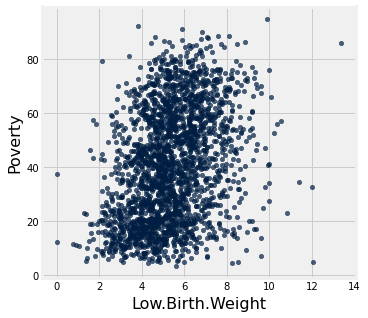

In [36]:
la_county.scatter("Low.Birth.Weight", "Poverty")

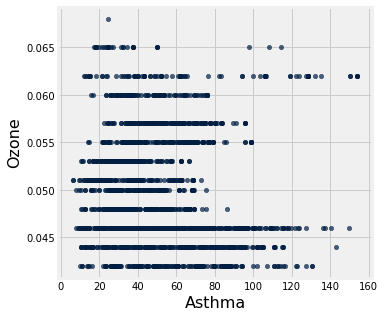

In [37]:
la_county.scatter("Asthma", "Ozone")

## Histograms

Another type of visualization that you may have seen before is a histogram. Because it displays the distribution of a quantitative variable, it is very useful for numerical data. In the context of a histogram, the distribution will show how frequent numbers from a number range appear.

Run the following cell to see the distribution of CalEnviroScreen scores.

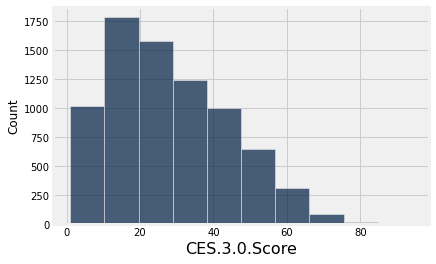

In [4]:
ces_data.hist("CES.3.0.Score", normed=False)

What do you notice about the shape of this histogram?

_Written Answer:_

<div class="alert alert-info">
    Choose another quantitative variable to create a histogram for and make sure to use the <code>normed=False</code> argument.
    </div>

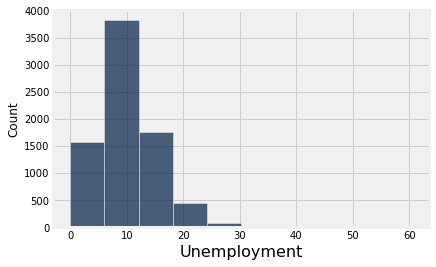

In [24]:
ces_data.hist("Unemployment", normed=False)

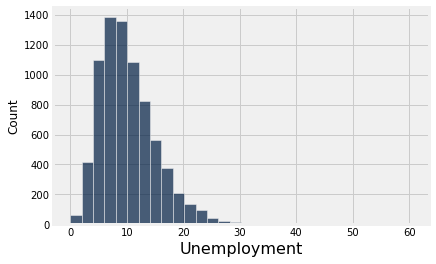

In [32]:
ces_data.hist("Unemployment", bins=30, normed=False)

Not all of the histograms look as nice as the CalEnviroScreen histogram because some of our data is distributed differently. For example, (pesticides) !!

## Bar Charts

It's a little hard to work with the current `ces_data` table because there are so many census tracts. Let's try looking at unique counties instead of unique census tracts. To do so, we need to think about how we want to represent our information. For example, is it better to take the sum of the Alameda census tracts' populations or the average of the Alameda census tracts' populations?

<div class="alert alert-info">
    Assign <code>sum_attributes</code> to a new array containing "California.County" and the name(s) of the column(s) we would want to take sums of. You don't need to know how the following line of code works, but you can read it and see if you have an idea of what happens in that line.
    </div>

In [11]:
sum_attributes = make_array("California.County", "Total.Population")

county_sums = ces_data.select(sum_attributes).group("California.County", sum)
county_sums

California.County,Total.Population sum
Alameda,1474913
Amador,38091
Butte,220000
Calaveras,44636
Colusa,21419
Contra Costa,1027163
Del Norte,10906
El Dorado,179910
Fresno,901157
Glenn,28122


<div class="alert alert-info">
    Now assign <code>avg_attributes</code> to an array with "California.County", "CES.3.0.Score", and three other columns that we would want to take averages of. Again, you don't need to know how the following line works.
    </div>

In [13]:
avg_attributes = make_array("California.County", "Longitude", "Latitude", "CES.3.0.Score", "Ozone", "PM2.5", "Diesel.PM", "Poverty")

county_avgs = ces_data.select(avg_attributes).group("California.County", np.average)
county_avgs

California.County,Longitude average,Latitude average,CES.3.0.Score average,Ozone average,PM2.5 average,Diesel.PM average,Poverty average
Alameda,-122.117,37.7183,23.1082,0.032616,8.77722,33.0201,28.0092
Amador,-120.726,38.41,22.3833,0.0536667,6.64828,0.656222,27.9889
Butte,-121.707,39.6627,22.0051,0.0502157,9.05137,7.85133,44.8824
Calaveras,-120.568,38.1672,15.3656,0.0534444,6.43665,0.401333,30.9667
Colusa,-122.14,39.18,27.406,0.0464,7.2396,2.2946,41.76
Contra Costa,-122.053,37.9373,20.0772,0.036275,8.01259,14.8781,24.966
Del Norte,-124.251,41.7733,12.035,0.035,3.66779,0.969,48.85
El Dorado,-120.673,38.7561,10.2985,0.0549,6.92034,2.1097,25.6625
Fresno,-119.767,36.7464,43.269,0.0634764,15.2094,24.4689,51.088
Glenn,-122.196,39.6408,23.6117,0.0476667,8.59246,4.18617,44.4833


Notice what happens after we made the tables with one row per unique county. Both tables have only 56 rows (or 56 counties) and have different column names.

Since visualizing 56 different counties might get a little messy, we'll only work with bay area counties for the remainder of the notebook. You don't need to understnad the next code cell, but it might help you understand what has happened.

In the next cell, we join the `county_sums` table with the `county_avgs` table so that all the data can be accessed in one table. Then, we make an array with only bay area counties and keep the rows where "California.County" is a bay area county.

In [25]:
county_statistics = county_sums.join("California.County", county_avgs)

bay_counties = make_array("Alameda ", "Contra Costa", "Marin ", "Napa ", "San Mateo", "Santa Clara", "Solano ", "Sonoma ", "San Francisco")
bay_county_statistics = county_statistics.where("California.County", are.contained_in(bay_counties))

bay_county_statistics

California.County,Total.Population sum,Longitude average,Latitude average,CES.3.0.Score average,Ozone average,PM2.5 average,Diesel.PM average,Poverty average
Alameda,1474913,-122.117,37.7183,23.1082,0.032616,8.77722,33.0201,28.0092
Contra Costa,1027163,-122.053,37.9373,20.0772,0.036275,8.01259,14.8781,24.966
Marin,246517,-122.553,37.988,8.83736,0.0306226,7.21895,7.40162,19.4849
Napa,134454,-122.328,38.3432,17.0926,0.0348158,7.71991,9.20958,27.1842
San Francisco,793042,-122.437,37.7613,17.2039,0.03,8.57085,64.6639,27.7154
San Mateo,709378,-122.333,37.5606,16.1459,0.0318506,9.02458,16.2943,19.3643
Santa Clara,1773846,-121.911,37.3156,18.5394,0.0367302,10.1486,21.4824,22.5452
Solano,397547,-122.086,38.2254,23.2822,0.0383626,7.89183,13.5457,31.4319
Sonoma,475933,-122.724,38.4126,16.3741,0.0316458,6.53593,10.8022,29.1156


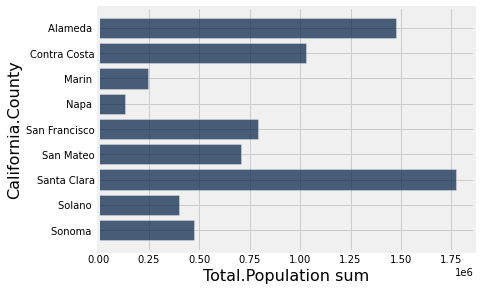

In [20]:
bay_county_statistics.barh("California.County", "Total.Population sum")

Let's sort the bars in order so that we have a better idea of the relative differences between different counties. Notice that the counties in the above bar graph are sorted in the same order as the column "California.County" in the `bay_county_statistics` table. Try to think of how we could get our bars to appear in order of lowest total population to highest.

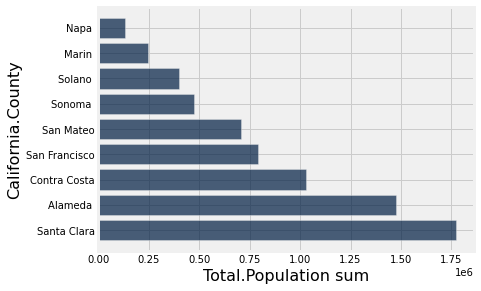

In [21]:
bay_county_statistics.sort("Total.Population sum").barh("California.County", "Total.Population sum")